In [1]:
# Mental Health Prediction Using Machine Learning.

In [3]:
# Download packages and libraries to be used for data reading and cleaning.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# stacking
from mlxtend.classifier import StackingClassifier

In [4]:
# Import raw data.
df = pd.read_csv('survey.csv')

In [5]:
# Check data shape.
print(df.shape)

(1259, 27)


In [6]:
# Check data types and columns.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
# Check top 10 records.
pd.set_option('display.max_columns', None) # this is done so all columns are displayed since
                                           # by default pandas truncates large datasets.

df.head(10)

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   
5  2014-08-27 11:31:22   33    Male   United States    TN           NaN   
6  2014-08-27 11:31:50   35  Female   United States    MI           NaN   
7  2014-08-27 11:32:05   39       M          Canada   NaN           NaN   
8  2014-08-27 11:32:39   42  Female   United States    IL           NaN   
9  2014-08-27 11:32:43   23    Male          Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   
5            Yes        No      Sometimes            6-25          No   
6            Yes       Yes      Sometimes             1-5         Yes   
7             No        No          Never             1-5         Yes   
8            Yes       Yes      Sometimes         100-500          No   
9             No        No          Never          26-100          No   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes         Yes     Not sure               No         Yes   
1           No  Don't know           No       Don't know  Don't know   
2          Yes          No           No               No          No   
3          Yes          No          Yes               No          No   
4          Yes         Yes           No       Don't know  Don't know   
5          Yes         Yes     Not sure               No  Don't know   
6          Yes          No           No               No          No   
7          Yes          No          Yes               No          No   
8          Yes         Yes          Yes               No          No   
9          Yes  Don't know           No       Don't know  Don't know   

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1  Don't know          Don't know                     Maybe   
2  Don't know  Somewhat difficult                        No   
3          No  Somewhat difficult                       Yes   
4  Don't know          Don't know                        No   
5  Don't know          Don't know                        No   
6          No  Somewhat difficult                     Maybe   
7         Yes          Don't know                        No   
8          No      Very difficult                     Maybe   
9  Don't know          Don't know                        No   

  phys_health_consequence     coworkers supervisor mental_health_interview  \
0                      No  Some of them        Yes                      No   
1                      No            No         No                      No   
2                      No           Yes        Yes                     Yes   
3                     Yes  Some of them         No                   Maybe   
4                      No  Some of them        Yes                     Yes   
5                      No           Yes        Yes                      No   
6                   Maybe  Some of them         No                      No   
7                      No            No         No                      No   
8                      No           Yes        Yes                      No   
9                      No           Yes        Yes                   Maybe   

  phys_health_interview mental_vs_phy

In [8]:
# Check basic statistics for data.

df.describe(include = 'all')

Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:44:51           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    NaN            NaN   NaN   
min                     NaN -1.726000e+03    NaN            NaN   NaN   
25%                     NaN  2.700000e+01    NaN            NaN   NaN   
50%                     NaN  3.100000e+01    NaN            NaN   NaN   
75%                     NaN  3.600000e+01    NaN            NaN   NaN   
max                     NaN  1.000000e+11    NaN            NaN   NaN   

       self_employed family_history treatment work_interfere no_employees  \
count           1241           1259      1259            995         1259   
unique             2              2         2              4            6   
top               No             No       Yes      Sometimes         6-25   
freq            1095            767       637            465          290   
mean             NaN            NaN       NaN            NaN          NaN   
std              NaN            NaN       NaN            NaN          NaN   
min              NaN            NaN       NaN            NaN          NaN   
25%              NaN            NaN       NaN            NaN          NaN   
50%              NaN            NaN       NaN            NaN          NaN   
75%              NaN            NaN       NaN            NaN          NaN   
max              NaN            NaN       NaN            NaN          NaN   

       remote_work tech_company benefits care_options wellness_program  \
count         1259         1259     1259         1259             1259   
unique           2            2        3            3                3   
top             No          Yes      Yes           No               No   
freq           883         1031      477          501              842   
mean           NaN          NaN      NaN          NaN              NaN   
std            NaN          NaN      NaN          NaN              NaN   
min            NaN          NaN      NaN          NaN              NaN   
25%            NaN          NaN      NaN          NaN              NaN   
50%            NaN          NaN      NaN          NaN              NaN   
75%            NaN          NaN      NaN          NaN              NaN   
max            NaN          NaN      NaN          NaN              NaN   

       seek_help   anonymity       leave mental_health_consequence  \
count       1259        1259        1259                      1259   
unique         3           3           5                         3   
top           No  Don't know  Don't know                        No   
freq         646         819         563                       490   
mean         NaN         NaN         NaN                       NaN   
std          NaN         NaN         NaN                       NaN   
min          NaN         NaN         NaN                       NaN   
25%          NaN         NaN         NaN                       NaN   
50%          NaN         NaN         NaN                       NaN   
75%          NaN         NaN         NaN                       NaN   
max          NaN         NaN         NaN                       NaN   

       phys_health_consequence     coworkers supervisor  \
count                     1259          1259       1259   
unique                       3             3          3   
top                         No  Some of them        Yes   
freq                       925           774        516   
mean                       NaN           NaN        NaN   
std                        NaN           NaN        NaN   
min                        NaN           NaN        NaN   
25%           

In [9]:
# Check missing data.

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [10]:
# Dealing with missing data.
# Drop column 'Timestamp' since it will not be used in modelling.
# Also drop columns 'comments' and 'state' because they are mostly empty.

# Copy data into new data frame.
df2 = df.copy()

In [11]:
# Check if data copied correctly.
df2.shape

(1259, 27)

In [12]:
# Drop columns previously mentioned.
df2.drop(['Timestamp'], axis = 1, inplace = True)
df2.drop(['comments'], axis = 1, inplace = True)
df2.drop(['state'], axis = 1, inplace = True)

In [13]:
# Check if columns were dropped.
df2.shape

(1259, 24)

In [14]:
# Get columns names.
df2.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [15]:
# Fill empty records.

# Set default values for each data type.
defaultInt = 0
defaultFloat = 0.0
defaultString = 'NaN'

In [16]:
# Create features list.
intFeatures = ['Age']
floatFeatures = []
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [17]:
# Replace empty records with default values.
for feature in df2:
    if feature in intFeatures:
        df2[feature] = df2[feature].fillna(defaultInt)
    elif feature in floatFeatures:
        df2[feature] = df2[feature].fillna(defaultFloat)
    elif feature in stringFeatures:
        df2[feature] = df2[feature].fillna(defaultString)
    else:
        print('Error featre %s not identified.' % feature)

In [18]:
# Check if empty records were properly filled.
df2.describe(include = 'all')

Age Gender        Country self_employed family_history  \
count   1.259000e+03   1259           1259          1259           1259   
unique           NaN     49             48             3              2   
top              NaN   Male  United States            No             No   
freq             NaN    615            751          1095            767   
mean    7.942815e+07    NaN            NaN           NaN            NaN   
std     2.818299e+09    NaN            NaN           NaN            NaN   
min    -1.726000e+03    NaN            NaN           NaN            NaN   
25%     2.700000e+01    NaN            NaN           NaN            NaN   
50%     3.100000e+01    NaN            NaN           NaN            NaN   
75%     3.600000e+01    NaN            NaN           NaN            NaN   
max     1.000000e+11    NaN            NaN           NaN            NaN   

       treatment work_interfere no_employees remote_work tech_company  \
count       1259           1259         1259        1259         1259   
unique         2              5            6           2            2   
top          Yes      Sometimes         6-25          No          Yes   
freq         637            465          290         883         1031   
mean         NaN            NaN          NaN         NaN          NaN   
std          NaN            NaN          NaN         NaN          NaN   
min          NaN            NaN          NaN         NaN          NaN   
25%          NaN            NaN          NaN         NaN          NaN   
50%          NaN            NaN          NaN         NaN          NaN   
75%          NaN            NaN          NaN         NaN          NaN   
max          NaN            NaN          NaN         NaN          NaN   

       benefits care_options wellness_program seek_help   anonymity  \
count      1259         1259             1259      1259        1259   
unique        3            3                3         3           3   
top         Yes           No               No        No  Don't know   
freq        477          501              842       646         819   
mean        NaN          NaN              NaN       NaN         NaN   
std         NaN          NaN              NaN       NaN         NaN   
min         NaN          NaN              NaN       NaN         NaN   
25%         NaN          NaN              NaN       NaN         NaN   
50%         NaN          NaN              NaN       NaN         NaN   
75%         NaN          NaN              NaN       NaN         NaN   
max         NaN          NaN              NaN       NaN         NaN   

             leave mental_health_consequence phys_health_consequence  \
count         1259                      1259                    1259   
unique           5                         3                       3   
top     Don't know                        No                      No   
freq           563                       490                     925   
mean           NaN                       NaN                     NaN   
std            NaN                       NaN                     NaN   
min            NaN                       NaN                     NaN   
25%            NaN                       NaN                     NaN   
50%            NaN                       NaN                     NaN   
75%            NaN                       NaN                     NaN   
max            NaN                       NaN                     NaN   

           coworkers supervisor mental_health_interview phys_health_interview  \
count           1259       1259                    1259                  1259   
unique             3          3                       3                     3   
top     Some of them        Yes                      No                 Maybe   
freq             774        516                    1008                   557   
mean             NaN        NaN                     NaN                   NaN   
std              NaN        NaN    

In [19]:
# Clean 'gender' column, since it has 49 unique values.

# Check values.
gender = df2['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [20]:
# Check count by category.
df2['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [21]:
# Change 'Gender' to 3 values: M, F, LGBTQ.
df2['Gender'] = df2['Gender'].map({'Female':'F',
                                   'M':'M',
                                   'Male':'M',
                                   'male':'M',
                                   'female':'F',
                                   'm':'M',
                                   'Male-ish':'M',
                                   'maile':'M',
                                   'Trans-female':'LGBTQ',
                                   'Cis Female':'F',
                                   'F':'F',
                                   'something kinda male?':'M',
                                   'Cis Male':'M',
                                   'Woman':'M',
                                   'f':'F',
                                   'Mal':'M',
                                   'Male (CIS)':'M',
                                   'queer/she/they':'LGBTQ',
                                   'non-binary':'LGBTQ',
                                   'Femake':'F',
                                   'woman':'F',
                                   'Make':'M',
                                   'Nah':'LGBTQ',
                                   'All':'LGBTQ',
                                   'Enby':'LGBTQ',
                                   'fluid':'LGBTQ',
                                   'Genderqueer':'LGBTQ',
                                   'Female ':'F',
                                   'Androgyne':'LGBTQ',
                                   'Agender':'LGBTQ',
                                   'cis-female/femme':'F',
                                   'Guy (-ish) ^_^':'M',
                                   'male leaning androgynous':'M',
                                   'Male ':'M',
                                   'Man':'M',
                                   'Trans woman':'LGBTQ',
                                   'msle':'M',
                                   'Neuter':'LGBTQ',
                                   'Female (trans)':'LGBTQ',
                                   'queer':'LGBTQ',
                                   'Female (cis)':'F',
                                   'Mail':'M',
                                   'cis male':'M',
                                   'A little about you':'LGBTQ',
                                   'Malr':'M',
                                   'p':'LGBTQ',
                                   'femail':'F',
                                   'Cis Man':'M',
                                   'ostensibly male, unsure what that really means':'M'})

In [22]:
gender = df2['Gender'].unique()
print(gender)

['F' 'M' 'LGBTQ']


In [23]:
# Check 'Age' values.
df2['Age'].sort_values(ascending = False)

390     99999999999
364             329
1182             72
560              65
520              62
           ...     
989               8
734               5
1127             -1
143             -29
715           -1726
Name: Age, Length: 1259, dtype: int64

In [24]:
# Many invalid values, check mean and median to substitute invalid values.
df2['Age'].mean()

79428148.31135821

In [25]:
df2['Age'].median()

31.0

In [26]:
# Age mean is really affected by extreme values, so we´ll use median.

In [27]:
median_age = df2['Age'].median()
median_age

31.0

In [28]:
# Replace values lower than 18 (minimum age required to get a job).
df2.loc[df2['Age']<18, 'Age'] = median_age

In [29]:
# Replace values older than 72 (maximum real age in data).
df2.loc[df2['Age']>72, 'Age'] = median_age

In [30]:
# Check results.
df2['Age'].sort_values(ascending = False)

1182    72
560     65
520     62
952     61
297     60
        ..
287     18
282     18
478     18
93      18
482     18
Name: Age, Length: 1259, dtype: int64

In [31]:
# Create new column with age range.
df2['age_range'] = pd.cut(df2['Age'], 
                          [0, 20, 30, 65, 100],
                          labels = ['0-20', '21-30', '31-65', '66-100'],
                         include_lowest = True)

In [32]:
# Check if column was created correctly.
df2.head(10)

Age Gender         Country self_employed family_history treatment  \
0   37      F   United States           NaN             No       Yes   
1   44      M   United States           NaN             No        No   
2   32      M          Canada           NaN             No        No   
3   31      M  United Kingdom           NaN            Yes       Yes   
4   31      M   United States           NaN             No        No   
5   33      M   United States           NaN            Yes        No   
6   35      F   United States           NaN            Yes       Yes   
7   39      M          Canada           NaN             No        No   
8   42      F   United States           NaN            Yes       Yes   
9   23      M          Canada           NaN             No        No   

  work_interfere    no_employees remote_work tech_company    benefits  \
0          Often            6-25          No          Yes         Yes   
1         Rarely  More than 1000          No           No  Don't know   
2         Rarely            6-25          No          Yes          No   
3          Often          26-100          No          Yes          No   
4          Never         100-500         Yes          Yes         Yes   
5      Sometimes            6-25          No          Yes         Yes   
6      Sometimes             1-5         Yes          Yes          No   
7          Never             1-5         Yes          Yes          No   
8      Sometimes         100-500          No          Yes         Yes   
9          Never          26-100          No          Yes  Don't know   

  care_options wellness_program   seek_help   anonymity               leave  \
0     Not sure               No         Yes         Yes       Somewhat easy   
1           No       Don't know  Don't know  Don't know          Don't know   
2           No               No          No  Don't know  Somewhat difficult   
3          Yes               No          No          No  Somewhat difficult   
4           No       Don't know  Don't know  Don't know          Don't know   
5     Not sure               No  Don't know  Don't know          Don't know   
6           No               No          No          No  Somewhat difficult   
7          Yes               No          No         Yes          Don't know   
8          Yes               No          No          No      Very difficult   
9           No       Don't know  Don't know  Don't know          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   
2                        No                      No           Yes        Yes   
3                       Yes                     Yes  Some of them         No   
4                        No                      No  Some of them        Yes   
5                        No                      No           Yes        Yes   
6                     Maybe                   Maybe  Some of them         No   
7                        No                      No            No         No   
8                     Maybe                      No           Yes        Yes   
9                        No                      No           Yes        Yes   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   
2                     Yes                   Yes                 No   
3                   Maybe                 Maybe                 No   
4                     Yes                   Yes         Don't know   
5                      No                 Maybe         Don't know   
6                      No                    No         Don't know   
7                      No                    No                 No   
8                      No

In [33]:
# Check distribution for self employed column.
df2['self_employed'].value_counts()

No     1095
Yes     146
NaN      18
Name: self_employed, dtype: int64

In [34]:
# Very little null values, change to No.
df2.loc[df2['self_employed'] == 'NaN', 'self_employed'] = 'No'

In [35]:
df2['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

In [36]:
# Check work interfere column distribution.
df2['work_interfere'].value_counts()

Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [37]:
# Change nulls to unknown.
df2.loc[df2['work_interfere'] == 'NaN', 'work_interfere'] = 'Unknown'

In [38]:
df2['work_interfere'].value_counts()

Sometimes    465
Unknown      264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [39]:
# Check country distribution.
df2['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [40]:
# Largely skewed to 2 countries, best drop it.
df2 = df2.drop(['Country'], axis = 1)

In [41]:
df2.shape

(1259, 24)

In [42]:
# Create new data set for encoding.
df3 = df2.copy()

In [43]:
# Save new dataset to csv.
df3.to_csv('survey_clean.csv', index = False)

In [44]:
# Load cleand data.
data_clean = pd.read_csv('survey_clean.csv')

In [45]:
data_clean.shape

(1259, 24)

In [46]:
data_clean.head(10)

Age Gender self_employed family_history treatment work_interfere  \
0   37      F            No             No       Yes          Often   
1   44      M            No             No        No         Rarely   
2   32      M            No             No        No         Rarely   
3   31      M            No            Yes       Yes          Often   
4   31      M            No             No        No          Never   
5   33      M            No            Yes        No      Sometimes   
6   35      F            No            Yes       Yes      Sometimes   
7   39      M            No             No        No          Never   
8   42      F            No            Yes       Yes      Sometimes   
9   23      M            No             No        No          Never   

     no_employees remote_work tech_company    benefits care_options  \
0            6-25          No          Yes         Yes     Not sure   
1  More than 1000          No           No  Don't know           No   
2            6-25          No          Yes          No           No   
3          26-100          No          Yes          No          Yes   
4         100-500         Yes          Yes         Yes           No   
5            6-25          No          Yes         Yes     Not sure   
6             1-5         Yes          Yes          No           No   
7             1-5         Yes          Yes          No          Yes   
8         100-500          No          Yes         Yes          Yes   
9          26-100          No          Yes  Don't know           No   

  wellness_program   seek_help   anonymity               leave  \
0               No         Yes         Yes       Somewhat easy   
1       Don't know  Don't know  Don't know          Don't know   
2               No          No  Don't know  Somewhat difficult   
3               No          No          No  Somewhat difficult   
4       Don't know  Don't know  Don't know          Don't know   
5               No  Don't know  Don't know          Don't know   
6               No          No          No  Somewhat difficult   
7               No          No         Yes          Don't know   
8               No          No          No      Very difficult   
9       Don't know  Don't know  Don't know          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   
2                        No                      No           Yes        Yes   
3                       Yes                     Yes  Some of them         No   
4                        No                      No  Some of them        Yes   
5                        No                      No           Yes        Yes   
6                     Maybe                   Maybe  Some of them         No   
7                        No                      No            No         No   
8                     Maybe                      No           Yes        Yes   
9                        No                      No           Yes        Yes   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   
2                     Yes                   Yes                 No   
3                   Maybe                 Maybe                 No   
4                     Yes                   Yes         Don't know   
5                      No                 Maybe         Don't know   
6                      No                    No         Don't know   
7                      No                    No                 No   
8                      No                 Maybe                 No   
9                   Maybe                 Maybe                Yes   

  obs_consequence age_range  
0              No     31-65  


In [47]:
# Create copy to encode and manipulate.
df3 = data_clean.copy()

In [48]:
# Check copy.
df3.head(10)

Age Gender self_employed family_history treatment work_interfere  \
0   37      F            No             No       Yes          Often   
1   44      M            No             No        No         Rarely   
2   32      M            No             No        No         Rarely   
3   31      M            No            Yes       Yes          Often   
4   31      M            No             No        No          Never   
5   33      M            No            Yes        No      Sometimes   
6   35      F            No            Yes       Yes      Sometimes   
7   39      M            No             No        No          Never   
8   42      F            No            Yes       Yes      Sometimes   
9   23      M            No             No        No          Never   

     no_employees remote_work tech_company    benefits care_options  \
0            6-25          No          Yes         Yes     Not sure   
1  More than 1000          No           No  Don't know           No   
2            6-25          No          Yes          No           No   
3          26-100          No          Yes          No          Yes   
4         100-500         Yes          Yes         Yes           No   
5            6-25          No          Yes         Yes     Not sure   
6             1-5         Yes          Yes          No           No   
7             1-5         Yes          Yes          No          Yes   
8         100-500          No          Yes         Yes          Yes   
9          26-100          No          Yes  Don't know           No   

  wellness_program   seek_help   anonymity               leave  \
0               No         Yes         Yes       Somewhat easy   
1       Don't know  Don't know  Don't know          Don't know   
2               No          No  Don't know  Somewhat difficult   
3               No          No          No  Somewhat difficult   
4       Don't know  Don't know  Don't know          Don't know   
5               No  Don't know  Don't know          Don't know   
6               No          No          No  Somewhat difficult   
7               No          No         Yes          Don't know   
8               No          No          No      Very difficult   
9       Don't know  Don't know  Don't know          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No                      No  Some of them        Yes   
1                     Maybe                      No            No         No   
2                        No                      No           Yes        Yes   
3                       Yes                     Yes  Some of them         No   
4                        No                      No  Some of them        Yes   
5                        No                      No           Yes        Yes   
6                     Maybe                   Maybe  Some of them         No   
7                        No                      No            No         No   
8                     Maybe                      No           Yes        Yes   
9                        No                      No           Yes        Yes   

  mental_health_interview phys_health_interview mental_vs_physical  \
0                      No                 Maybe                Yes   
1                      No                    No         Don't know   
2                     Yes                   Yes                 No   
3                   Maybe                 Maybe                 No   
4                     Yes                   Yes         Don't know   
5                      No                 Maybe         Don't know   
6                      No                    No         Don't know   
7                      No                    No                 No   
8                      No                 Maybe                 No   
9                   Maybe                 Maybe                Yes   

  obs_consequence age_range  
0              No     31-65  


In [49]:
# Encode data.
labelDict = {}

for feature in df3:
    le = preprocessing.LabelEncoder()
    le.fit(df3[feature])
    le_name_mapping = dict(zip(le.classes_,
                               le.transform(le.classes_)))
    df3[feature] = le.transform(df3[feature])
# get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

for key, value in labelDict.items():
    print(key, value)  

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['F', 'LGBTQ', 'M']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes', 'Unknown']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No

In [50]:
# Check missing data.

total = df3.isnull().sum().sort_values(ascending = False)
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

In [51]:
# No more missing data!

In [52]:
# Check encodings.
df3.head(10)

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   19       0              0               0          1               1   
1   26       2              0               0          0               2   
2   14       2              0               0          0               2   
3   13       2              0               1          1               1   
4   13       2              0               0          0               0   
5   15       2              0               1          0               3   
6   17       0              0               1          1               3   
7   21       2              0               0          0               0   
8   24       0              0               1          1               3   
9    5       2              0               0          0               0   

   no_employees  remote_work  tech_company  benefits  care_options  \
0             4            0             1         2             1   
1             5            0             0         0             0   
2             4            0             1         1             0   
3             2            0             1         1             2   
4             1            1             1         2             0   
5             4            0             1         2             1   
6             0            1             1         1             0   
7             0            1             1         1             2   
8             1            0             1         2             2   
9             2            0             1         0             0   

   wellness_program  seek_help  anonymity  leave  mental_health_consequence  \
0                 1          2          2      2                          1   
1                 0          0          0      0                          0   
2                 1          1          0      1                          1   
3                 1          1          1      1                          2   
4                 0          0          0      0                          1   
5                 1          0          0      0                          1   
6                 1          1          1      1                          0   
7                 1          1          2      0                          1   
8                 1          1          1      3                          0   
9                 0          0          0      0                          1   

   phys_health_consequence  coworkers  supervisor  mental_health_interview  \
0                        1          1           2                        1   
1                        1          0           0                        1   
2                        1          2           2                        2   
3                        2          1           0                        0   
4                        1          1           2                        2   
5                        1          2           2                        1   
6                        0          1           0                        1   
7                        1          0           0                        1   
8                        1          2           2                        1   
9                        1          2           2                        0   

   phys_health_interview  mental_vs_physical  obs_consequence  age_range  
0                      0                   2                0          2  
1                      1                   0                0          2  
2                      2                   1                0          2  
3                      0                   1                1          2  
4                      2                   0                0          2  
5                      0                   0                0          2  
6                      1                   0                0          2  
7                      1                   1                0     

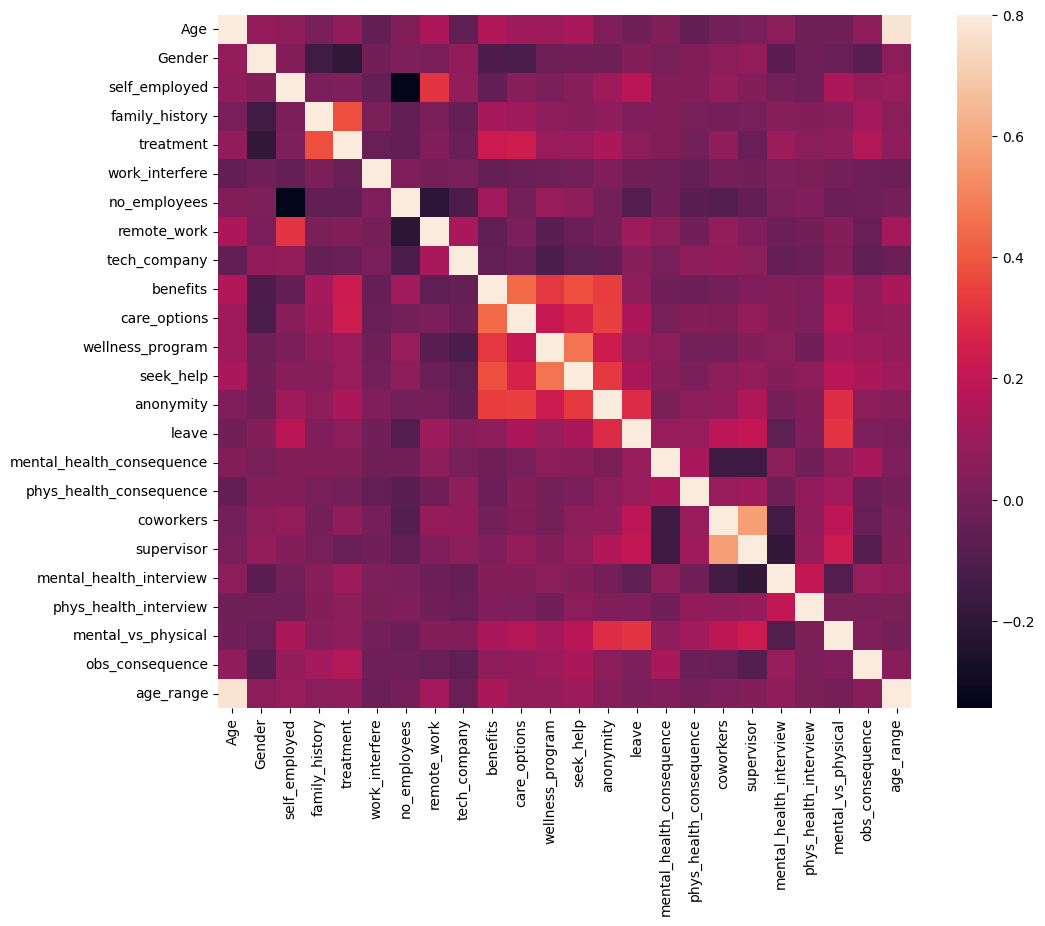

In [53]:
# Check correl matrix.
corrmat = df3.corr()
f, ax = plt.subplots(figsize = (12, 9))
sb.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [54]:
# Check for high correlations.
corrmat_2 = df3.corr().abs()
upper_tri = corrmat_2.where(np.triu(np.ones(corrmat_2.shape),k=1).astype(bool))
high_corr = corrmat_2.where(np.triu(np.ones(corrmat_2.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['age_range']


In [55]:
# Age range column will be dropped when training models. 
# It was only added for preliminary analysis.

In [56]:
# Check some plots for variable inference.

Text(0.5, 0, 'Age')

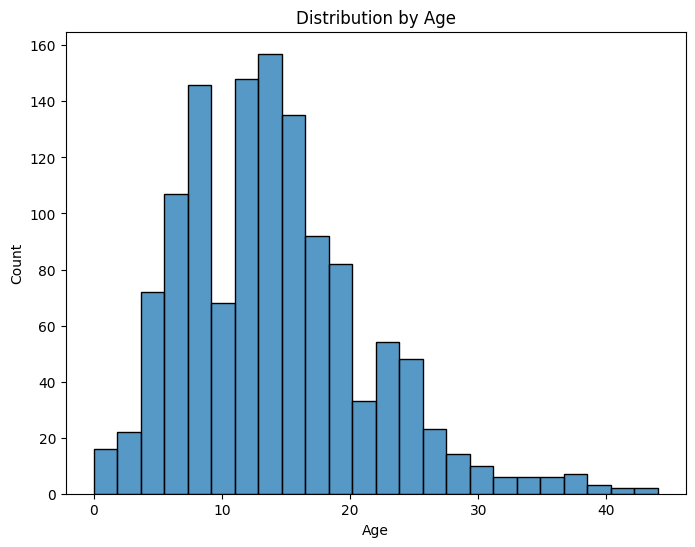

In [57]:
# Age distribution.
plt.figure(figsize = (8, 6))
sb.histplot(df3['Age'], bins = 24)
plt.title('Distribution by Age')
plt.xlabel('Age')

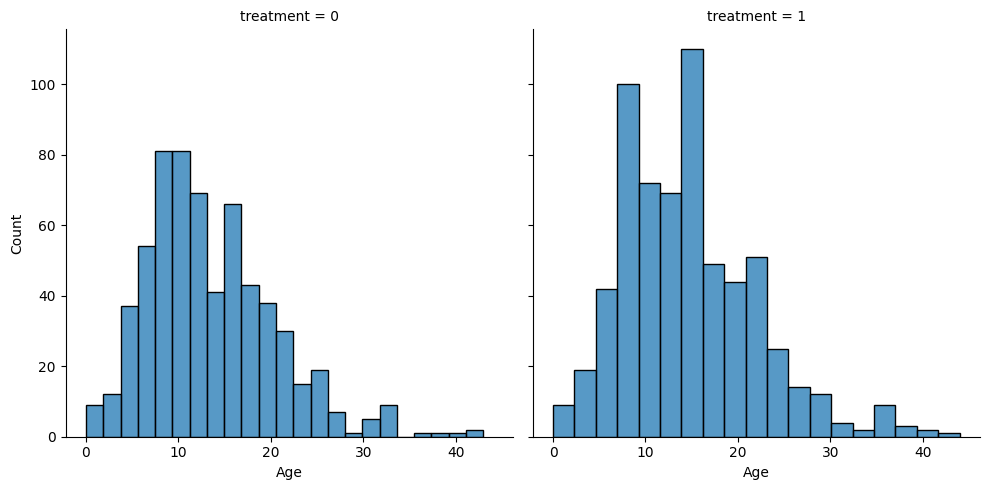

In [58]:
# Check treatment distribution by age.
j = sb.FacetGrid(df3, col = 'treatment', height = 5)
j = j.map(sb.histplot, 'Age')

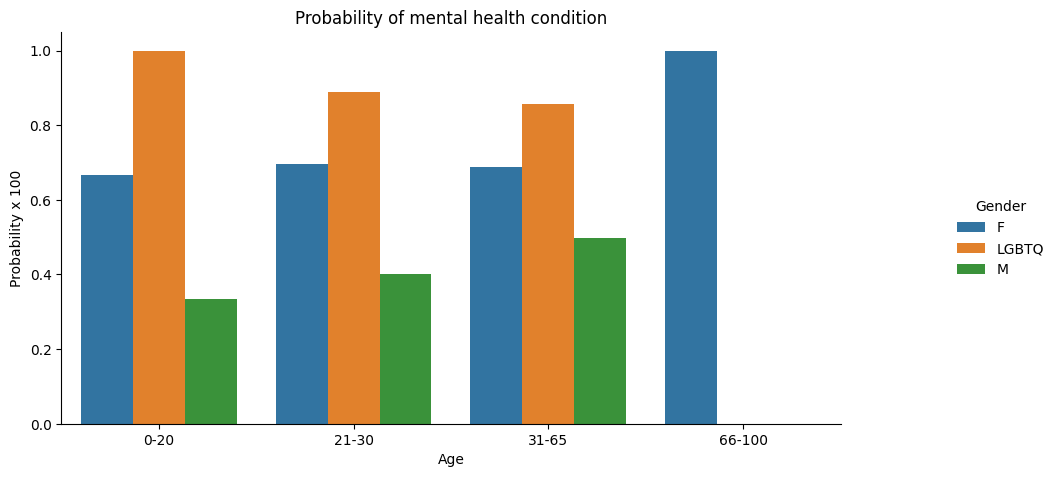

In [60]:
# Check probability of condition by age and gender.
o = labelDict['label_age_range']
j = sb.catplot(x = 'age_range',
                  y = 'treatment',
                  hue = 'Gender',
                  data = df3,
                  kind = 'bar',
                  errorbar = None,
                  height = 5,
                  aspect = 2,
                  legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top = 0.9, right = 0.8)
plt.show()

In [61]:
# Overall, lgbtq seems to have the greater probability for mental health condition.
# The exception being on the 66-100 age group, were females are the only ones to appear.

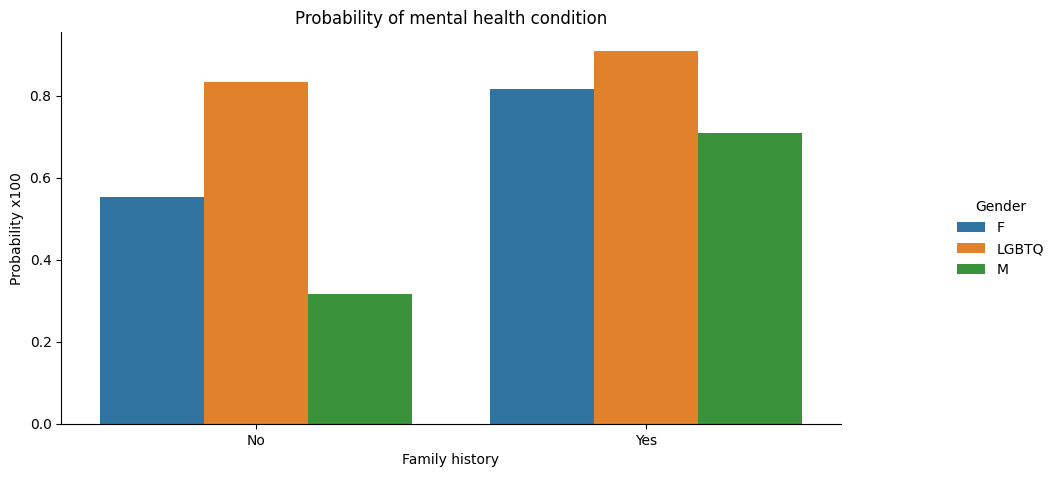

In [62]:
# Check probability of condition by family history and gender.
o = labelDict['label_family_history']
j = sb.catplot(x = 'family_history',
              y = 'treatment',
              hue = 'Gender',
              data = df3,
              kind = 'bar',
              errorbar = None,
              height = 5,
              aspect = 2,
              legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.xlabel('Family history')
plt.ylabel('Probability x100')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top = 0.9, right = 0.8)
plt.show()

In [63]:
# We can see that females and lgbtq have a high probability for a mental health condition,
# regardless of having a family history of mental conditions.

In [64]:
# Scale age for model training.
scaler = MinMaxScaler()

In [65]:
df3['Age'] = scaler.fit_transform(df3[['Age']])

In [66]:
df3.head(10)

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0  0.431818       0              0               0          1               1   
1  0.590909       2              0               0          0               2   
2  0.318182       2              0               0          0               2   
3  0.295455       2              0               1          1               1   
4  0.295455       2              0               0          0               0   
5  0.340909       2              0               1          0               3   
6  0.386364       0              0               1          1               3   
7  0.477273       2              0               0          0               0   
8  0.545455       0              0               1          1               3   
9  0.113636       2              0               0          0               0   

   no_employees  remote_work  tech_company  benefits  care_options  \
0             4            0             1         2             1   
1             5            0             0         0             0   
2             4            0             1         1             0   
3             2            0             1         1             2   
4             1            1             1         2             0   
5             4            0             1         2             1   
6             0            1             1         1             0   
7             0            1             1         1             2   
8             1            0             1         2             2   
9             2            0             1         0             0   

   wellness_program  seek_help  anonymity  leave  mental_health_consequence  \
0                 1          2          2      2                          1   
1                 0          0          0      0                          0   
2                 1          1          0      1                          1   
3                 1          1          1      1                          2   
4                 0          0          0      0                          1   
5                 1          0          0      0                          1   
6                 1          1          1      1                          0   
7                 1          1          2      0                          1   
8                 1          1          1      3                          0   
9                 0          0          0      0                          1   

   phys_health_consequence  coworkers  supervisor  mental_health_interview  \
0                        1          1           2                        1   
1                        1          0           0                        1   
2                        1          2           2                        2   
3                        2          1           0                        0   
4                        1          1           2                        2   
5                        1          2           2                        1   
6                        0          1           0                        1   
7                        1          0           0                        1   
8                        1          2           2                        1   
9                        1          2           2                        0   

   phys_health_interview  mental_vs_physical  obs_consequence  age_range  
0                      0                   2                0          2  
1                      1                   0                0          2  
2                      2                   1                0          2  
3                      0                   1                1          2  
4                      2                   0                0          2  
5                      0                   0                0          2  
6                      1                   0                0          2  
7               

In [67]:
df3.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

In [68]:
# Define x and y.
feature_cols = ['Age', 'Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [69]:
x = df3[feature_cols]

In [70]:
y = df3['treatment']

In [71]:
# Split data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   shuffle = True,
                                                   random_state = 0)

In [72]:
x_train.shape

(881, 22)

In [73]:
x_test.shape

(378, 22)

In [74]:
y_train.shape

(881,)

In [75]:
y_test.shape

(378,)

In [76]:
y_train.value_counts()

1    447
0    434
Name: treatment, dtype: int64

In [77]:
y_test.value_counts()

1    190
0    188
Name: treatment, dtype: int64

In [78]:
# Data sets are well balanced.

In [80]:
# Evaluating models.

In [81]:
# Logistic regression.

# Train the model.
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [82]:
# Summary table for model.
logreg_feature = x.columns.values
logreg_summary = pd.DataFrame(columns = ['logreg_feature'],
                                data = logreg_feature)
logreg_summary['Coefficient'] = np.transpose(logreg.coef_)
logreg_summary.index = logreg_summary.index + 1
logreg_summary.loc[0] = ['Intercept', logreg.intercept_[0]]
logreg_summary = logreg_summary.sort_index()
logreg_summary['Odds ratio'] = np.exp(logreg_summary.Coefficient)
print(logreg_summary)

               logreg_feature  Coefficient  Odds ratio
0                   Intercept    -1.133525    0.321896
1                         Age     0.513992    1.671953
2                      Gender    -0.362773    0.695744
3               self_employed    -0.205140    0.814534
4              family_history     1.648326    5.198272
5              work_interfere    -0.065513    0.936587
6                no_employees    -0.073636    0.929010
7                 remote_work     0.255566    1.291193
8                tech_company    -0.119029    0.887782
9                    benefits     0.348364    1.416748
10               care_options     0.385572    1.470455
11           wellness_program     0.004362    1.004372
12                  seek_help    -0.259406    0.771510
13                  anonymity     0.084400    1.088064
14                      leave     0.018292    1.018460
15  mental_health_consequence     0.013276    1.013364
16    phys_health_consequence     0.126314    1.134639
17        

In [83]:
# Make predictions on train and test to check accuracy.
logreg_y_pred_train = logreg.predict(x_train)
logreg_y_pred_test = logreg.predict(x_test)

In [84]:
# Train accuracy (overall correct predictions).
logreg_train_accuracy = metrics.accuracy_score(y_train, logreg_y_pred_train)
logreg_train_accuracy

0.7525539160045402

In [85]:
# Test accuracy (overall correct predictions).
logreg_test_accuracy = metrics.accuracy_score(y_test, logreg_y_pred_test)
logreg_test_accuracy

0.6904761904761905

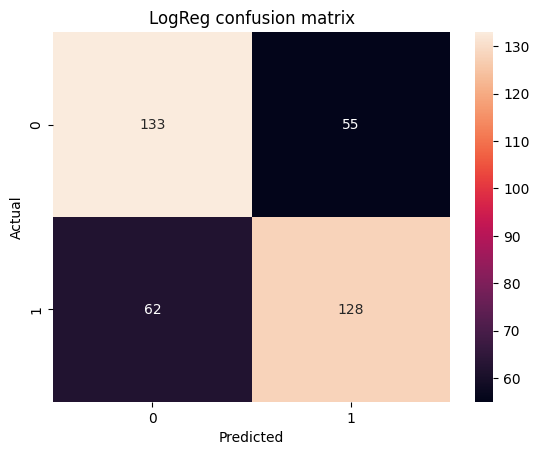

In [87]:
# Confusion matrix.
logreg_confusion = metrics.confusion_matrix(y_test, logreg_y_pred_test)
# row, column
logreg_TP = logreg_confusion[1, 1]
logreg_TN = logreg_confusion[0, 0]
logreg_FP = logreg_confusion[0, 1]
logreg_FN = logreg_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(logreg_confusion, annot = True, fmt = 'd')
plt.title('LogReg confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
# logreg precision (correctly predicted as positive).
logreg_precision = metrics.precision_score(y_test, logreg_y_pred_test)
logreg_precision

0.6994535519125683

In [89]:
# logreg recall (predicted as positive out of actual positive).
logreg_recall = metrics.recall_score(y_test, logreg_y_pred_test)
logreg_recall

0.6736842105263158

In [90]:
# logreg specificity (predicted as negative out of actual negative).
logreg_spec = logreg_TN/(logreg_TN + logreg_FP)
logreg_spec

0.7074468085106383

In [91]:
# logreg auc score (prob of correct id when presented with 2 random cases, 1+, 1-).
logreg_auc = metrics.roc_auc_score(y_test, logreg_y_pred_test)
logreg_auc

0.690565509518477

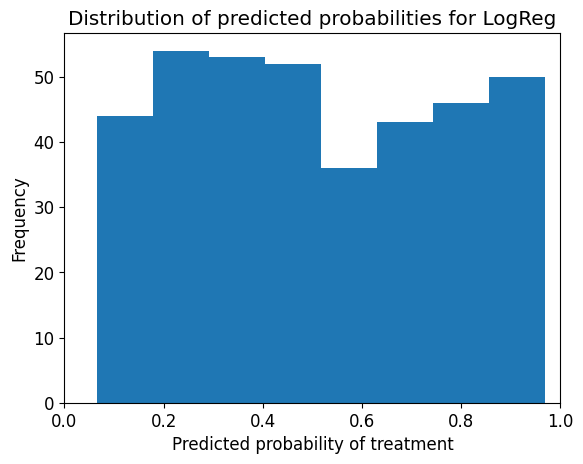

In [92]:
# histogram of predicted probabilities.
logreg_y_pred_prob = logreg.predict_proba(x_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(logreg_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for LogReg')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

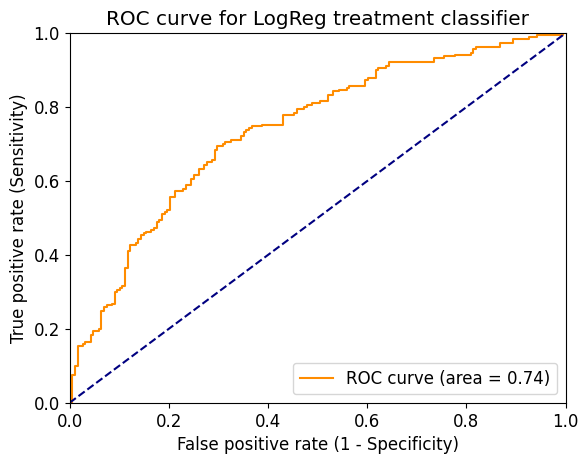

In [93]:
# ROC curve.
logreg_roc_auc = metrics.roc_auc_score(y_test, logreg_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for LogReg treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [95]:
# Lasso regression.
lasso = LassoCV(cv = 5)
lasso.fit(x_train, y_train)
best_alpha = lasso.alpha_
lasso_best = Lasso(alpha = best_alpha)
lasso_best.fit(x_train, y_train) 

Lasso(alpha=0.0012295095310541572)

In [96]:
# Summary table for model.
lasso_feature = x.columns.values
lasso_summary = pd.DataFrame(columns = ['lasso_feature'], data = lasso_feature)
lasso_summary['Coefficient'] = np.transpose(lasso_best.coef_)
lasso_summary.index = lasso_summary.index + 1
lasso_summary.loc[0] = ['Intercept', lasso_best.intercept_]
lasso_summary = lasso_summary.sort_index()
lasso_summary['Odds ratio'] = np.exp(lasso_summary.Coefficient)
print(lasso_summary)

                lasso_feature  Coefficient  Odds ratio
0                   Intercept     0.276228    1.318148
1                         Age     0.080984    1.084353
2                      Gender    -0.062049    0.939837
3               self_employed    -0.033097    0.967445
4              family_history     0.339680    1.404498
5              work_interfere    -0.012198    0.987876
6                no_employees    -0.013367    0.986722
7                 remote_work     0.040014    1.040825
8                tech_company    -0.012553    0.987525
9                    benefits     0.064052    1.066148
10               care_options     0.073440    1.076204
11           wellness_program     0.000000    1.000000
12                  seek_help    -0.043586    0.957350
13                  anonymity     0.013232    1.013320
14                      leave     0.001862    1.001864
15  mental_health_consequence     0.000000    1.000000
16    phys_health_consequence     0.010404    1.010458
17        

In [97]:
# Variables wellness program and mental health consequence were dropped from model.
# phys health interview and mental vs physical seem like could also be droped
# given their low coefficients.

In [98]:
# Make predictions on train and test to check accuracy.
lasso_y_pred_train = lasso_best.predict(x_train)
lasso_y_pred_train[lasso_y_pred_train > 0.5] = 1
lasso_y_pred_train[lasso_y_pred_train <= 0.5] = 0
lasso_y_pred_train = lasso_y_pred_train.astype('int64')

lasso_y_pred_test = lasso_best.predict(x_test)
lasso_y_pred_test[lasso_y_pred_test > 0.5] = 1
lasso_y_pred_test[lasso_y_pred_test <= 0.5] = 0
lasso_y_pred_test = lasso_y_pred_test.astype('int64')

In [99]:
# Train accuracy (overall correct predictions).
lasso_train_accuracy = metrics.accuracy_score(y_train, lasso_y_pred_train)
lasso_train_accuracy

0.7457434733257662

In [100]:
# Test accuracy (overall correct predictions).
lasso_test_accuracy = metrics.accuracy_score(y_test, lasso_y_pred_test)
lasso_test_accuracy

0.6851851851851852

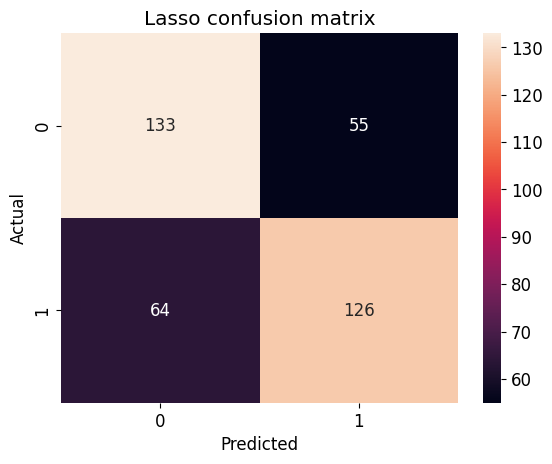

In [102]:
# Confusion matrix.
lasso_confusion = metrics.confusion_matrix(y_test, lasso_y_pred_test)
# row, column
lasso_TP = lasso_confusion[1, 1]
lasso_TN = lasso_confusion[0, 0]
lasso_FP = lasso_confusion[0, 1]
lasso_FN = lasso_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(lasso_confusion, annot = True, fmt = 'd')
plt.title('Lasso confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [103]:
# Lasso precision (correctly predicted as positive).
lasso_precision = metrics.precision_score(y_test, lasso_y_pred_test)
lasso_precision

0.6961325966850829

In [104]:
# lasso recall (predicted as positive out of actual positive).
lasso_recall = metrics.recall_score(y_test, lasso_y_pred_test)
lasso_recall

0.6631578947368421

In [105]:
# lasso specificity (predicted as negative out of actual negative).
lasso_spec = lasso_TN/(lasso_TN + lasso_FP)
lasso_spec

0.7074468085106383

In [106]:
# Lasso auc (prob of correct id when presented with 2 random cases, 1+, 1-).
lasso_auc = metrics.roc_auc_score(y_test, lasso_y_pred_test)
lasso_auc

0.6853023516237401

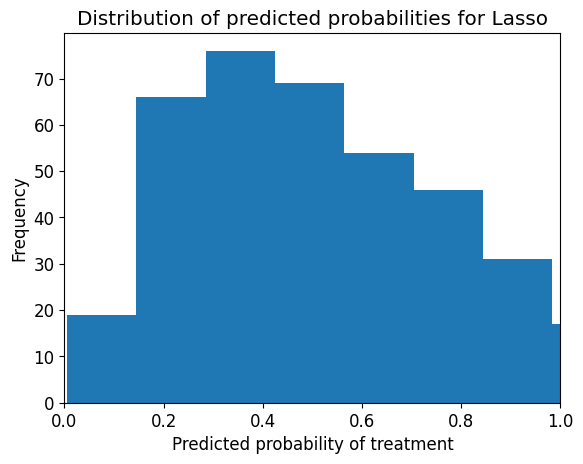

In [107]:
# histogram of predicted probabilities.
lasso_y_pred_prob = lasso.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(lasso_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for Lasso')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

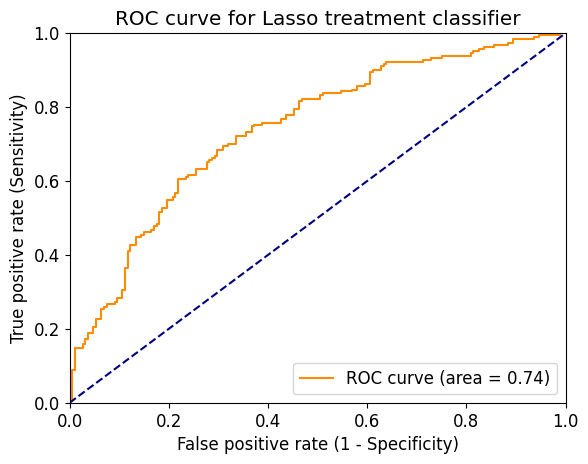

In [108]:
# ROC curve for lasso.
lasso_roc_auc = metrics.roc_auc_score(y_test, lasso_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lasso_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % lasso_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Lasso treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [110]:
# Ridge regression.
ridge_cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
ridge = RidgeCV(alphas = np.arange(0.01, 1, 0.01), cv = ridge_cv, 
                scoring = 'neg_mean_absolute_error')
ridge.fit(x_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [111]:
# Summarize model config.
print('alpha: %f' % ridge.alpha_)

alpha: 0.010000


In [112]:
# Summary table for model.
ridge_feature = x.columns.values
ridge_summary = pd.DataFrame(columns = ['ridge_feature'], data = ridge_feature)
ridge_summary['Coefficient'] = np.transpose(ridge.coef_)
ridge_summary.index = ridge_summary.index + 1
ridge_summary.loc[0] = ['Intercept', ridge.intercept_]
ridge_summary = ridge_summary.sort_index()
ridge_summary['Odds ratio'] = np.exp(ridge_summary.Coefficient)
print(ridge_summary)

                ridge_feature  Coefficient  Odds ratio
0                   Intercept     0.261204    1.298493
1                         Age     0.127632    1.136134
2                      Gender    -0.063564    0.938414
3               self_employed    -0.054781    0.946692
4              family_history     0.343426    1.409769
5              work_interfere    -0.012807    0.987275
6                no_employees    -0.014371    0.985731
7                 remote_work     0.046871    1.047987
8                tech_company    -0.020102    0.980098
9                    benefits     0.064686    1.066824
10               care_options     0.073379    1.076138
11           wellness_program     0.000636    1.000636
12                  seek_help    -0.049974    0.951254
13                  anonymity     0.016497    1.016633
14                      leave     0.002745    1.002749
15  mental_health_consequence     0.000788    1.000788
16    phys_health_consequence     0.016277    1.016410
17        

In [113]:
# Make predictions on train and test to check accuracy.
ridge_y_pred_train = ridge.predict(x_train)
ridge_y_pred_train[ridge_y_pred_train > 0.5] = 1
ridge_y_pred_train[ridge_y_pred_train <= 0.5] = 0
ridge_y_pred_train = ridge_y_pred_train.astype('int64')

ridge_y_pred_test = ridge.predict(x_test)
ridge_y_pred_test[ridge_y_pred_test > 0.5] = 1
ridge_y_pred_test[ridge_y_pred_test <= 0.5] = 0
ridge_y_pred_test = ridge_y_pred_test.astype('int64')

In [114]:
# Train accuracy (overall correct predictions).
ridge_train_accuracy = metrics.accuracy_score(y_train, ridge_y_pred_train)
ridge_train_accuracy

0.7525539160045402

In [115]:
# Test accuracy (overall correct predictions).
ridge_test_accuracy = metrics.accuracy_score(y_test, ridge_y_pred_test)
ridge_test_accuracy

0.6798941798941799

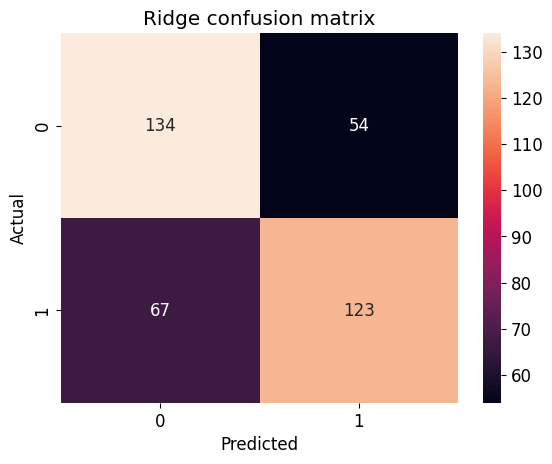

In [117]:
# Confusion matrix.
ridge_confusion = metrics.confusion_matrix(y_test, ridge_y_pred_test)
# row, column
ridge_TP = ridge_confusion[1, 1]
ridge_TN = ridge_confusion[0, 0]
ridge_FP = ridge_confusion[0, 1]
ridge_FN = ridge_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(ridge_confusion, annot = True, fmt = 'd')
plt.title('Ridge confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [118]:
# Ridge precision (correctly predicted as positive).
ridge_precision = metrics.precision_score(y_test, ridge_y_pred_test)
ridge_precision

0.6949152542372882

In [119]:
# ridge recall (predicted as positive out of actual positive).
ridge_recall = metrics.recall_score(y_test, ridge_y_pred_test)
ridge_recall

0.6473684210526316

In [120]:
# ridge specificity (predicted as negative out of actual negative).
ridge_spec = ridge_TN/(ridge_TN + ridge_FP)
ridge_spec

0.7127659574468085

In [121]:
# Ridge auc (prob of correct id when presented with 2 random cases, 1+, 1-).
ridge_auc = metrics.roc_auc_score(y_test, ridge_y_pred_test)
ridge_auc

0.68006718924972

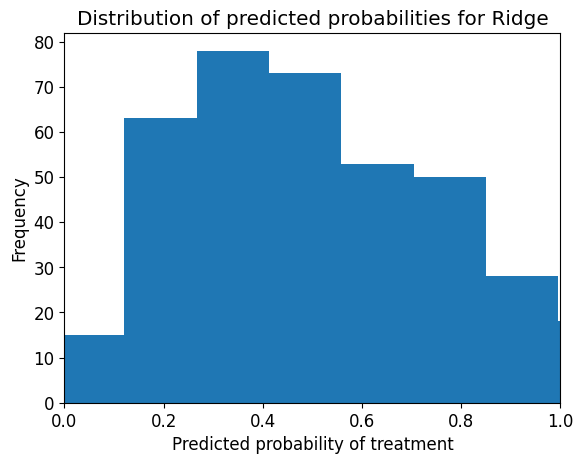

In [122]:
# histogram of predicted probabilities.
ridge_y_pred_prob = ridge.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(ridge_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for Ridge')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

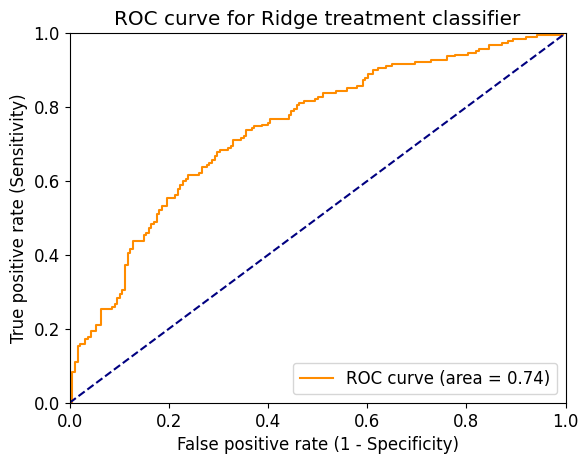

In [123]:
# ROC curve for Ridge.
ridge_roc_auc = metrics.roc_auc_score(y_test, ridge_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, ridge_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % ridge_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Ridge treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [128]:
# Elastic net.
enet_cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
enet_ratios = np.arange(0.01, 1, 0.01)
enet_alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0, 1.0, 10.0, 100.0]
enet = ElasticNetCV(l1_ratio = enet_ratios, alphas = enet_alphas, 
                    cv = enet_cv, n_jobs = -1)
enet.fit(x_train, y_train)

/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coo

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1.0, 10.0, 100.0],
             cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
             l1_ratio=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
             n_jobs=-1)

In [129]:
# Summarize model config.
print('alpha: %f' % enet.alpha_)
print('l1_ratio_: %f' % enet.l1_ratio_)

alpha: 0.010000
l1_ratio_: 0.480000


In [130]:
# Summary table for model.
enet_feature = x.columns.values
enet_summary = pd.DataFrame(columns = ['enet_feature'], data = enet_feature)
enet_summary['Coefficient'] = np.transpose(enet.coef_)
enet_summary.index = enet_summary.index + 1
enet_summary.loc[0] = ['Intercept', enet.intercept_]
enet_summary = enet_summary.sort_index()
enet_summary['Odds ratio'] = np.exp(enet_summary.Coefficient)
print(enet_summary)

                 enet_feature  Coefficient  Odds ratio
0                   Intercept     0.318560    1.375146
1                         Age     0.000000    1.000000
2                      Gender    -0.058678    0.943010
3               self_employed    -0.000000    1.000000
4              family_history     0.322213    1.380178
5              work_interfere    -0.010470    0.989585
6                no_employees    -0.012220    0.987854
7                 remote_work     0.021540    1.021773
8                tech_company    -0.000000    1.000000
9                    benefits     0.060534    1.062403
10               care_options     0.072534    1.075229
11           wellness_program     0.000000    1.000000
12                  seek_help    -0.024987    0.975323
13                  anonymity     0.005399    1.005414
14                      leave     0.000312    1.000312
15  mental_health_consequence     0.000000    1.000000
16    phys_health_consequence     0.000000    1.000000
17        

In [131]:
# Elastic net dropped several variables:
# age, self employed, remote work, tech company, welness program, mental health consequence
# mental vs physical, obs consequence

In [132]:
# Make predictions on train and test to check accuracy.
enet_y_pred_train = enet.predict(x_train)
enet_y_pred_train[enet_y_pred_train > 0.5] = 1
enet_y_pred_train[enet_y_pred_train <= 0.5] = 0
enet_y_pred_train = enet_y_pred_train.astype('int64')

enet_y_pred_test = enet.predict(x_test)
enet_y_pred_test[enet_y_pred_test > 0.5] = 1
enet_y_pred_test[enet_y_pred_test <= 0.5] = 0
enet_y_pred_test = enet_y_pred_test.astype('int64')

In [133]:
# Train accuracy (overall correct predictions).
enet_train_accuracy = metrics.accuracy_score(y_train, enet_y_pred_train)
enet_train_accuracy

0.7343927355278093

In [134]:
# Test accuracy (overall correct predictions).
enet_test_accuracy = metrics.accuracy_score(y_test, enet_y_pred_test)
enet_test_accuracy

0.6904761904761905

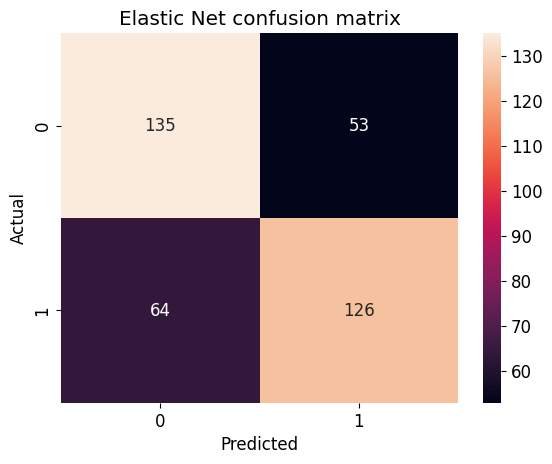

In [136]:
# Confusion matrix.
enet_confusion = metrics.confusion_matrix(y_test, enet_y_pred_test)
# row, column
enet_TP = enet_confusion[1, 1]
enet_TN = enet_confusion[0, 0]
enet_FP = enet_confusion[0, 1]
enet_FN = enet_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(enet_confusion, annot = True, fmt = 'd')
plt.title('Elastic Net confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [137]:
# Enet precision (correctly predicted as positive).
enet_precision = metrics.precision_score(y_test, enet_y_pred_test)
enet_precision

0.7039106145251397

In [138]:
# enet recall (predicted as positive out of actual positive).
enet_recall = metrics.recall_score(y_test, enet_y_pred_test)
enet_recall

0.6631578947368421

In [139]:
# enet specificity (predicted as negative out of actual negative).
enet_spec = enet_TN/(enet_TN + enet_FP)
enet_spec

0.7180851063829787

In [140]:
# Enet auc.
enet_auc = metrics.roc_auc_score(y_test, enet_y_pred_test)
enet_auc

0.6906215005599105

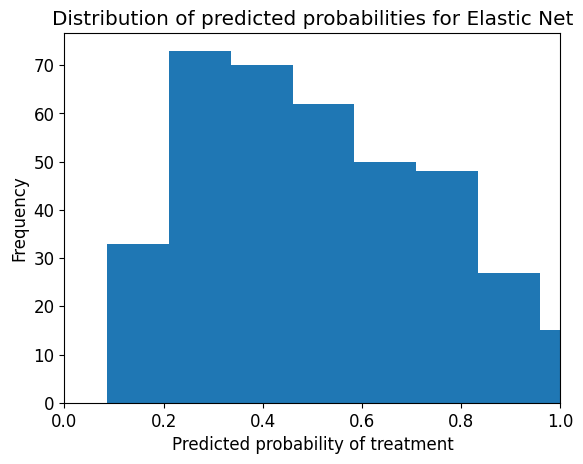

In [141]:
# histogram of predicted probabilities.
enet_y_pred_prob = enet.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(enet_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for Elastic Net')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

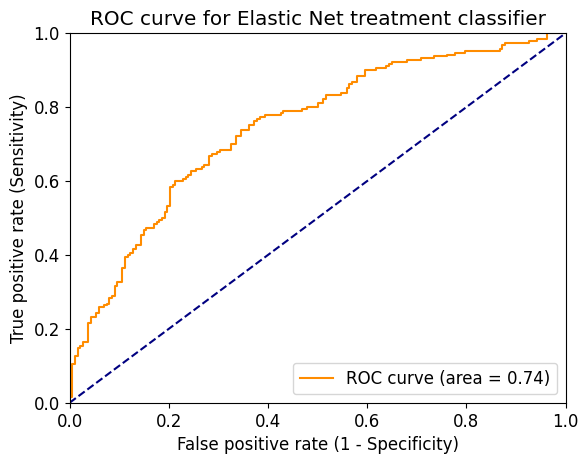

In [142]:
# ROC curve for Enet.
enet_roc_auc = metrics.roc_auc_score(y_test, enet_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, enet_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % enet_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Elastic Net treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [144]:
# Kneighbors.
k_range = np.arange(1, 31)
knn = KNeighborsClassifier(n_neighbors = k_range)
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors = k_range, weights = weight_options)
knn_best = RandomizedSearchCV(estimator = knn, 
                              param_distributions = param_dist,
                             cv = 10,
                             n_iter = 3,
                             n_jobs = 1)
knn_best.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=KNeighborsClassifier(n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])),
                   n_iter=3, n_jobs=1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'weights': ['uniform', 'distance']})

In [145]:
# Check final model config.
print(" Results from Random Search " )
print("\n Best parameters across ALL searched params:\n", knn_best.best_estimator_)
print("\n Best score across ALL searched params:\n", knn_best.best_score_)

 Results from Random Search 

 Best parameters across ALL searched params:
 KNeighborsClassifier(n_neighbors=14, weights='distance')

 Best score across ALL searched params:
 0.7366956077630236


In [146]:
# Make predictions on train and test to check accuracy.
knn_y_pred_train = knn_best.predict(x_train)
knn_y_pred_test = knn_best.predict(x_test)

In [147]:
# Train accuracy (overall correct predictions).
knn_train_accuracy = metrics.accuracy_score(y_train, knn_y_pred_train)
knn_train_accuracy

1.0

In [148]:
# Test accuracy (overall correct predictions).
knn_test_accuracy = metrics.accuracy_score(y_test, knn_y_pred_test)
knn_test_accuracy

0.6878306878306878

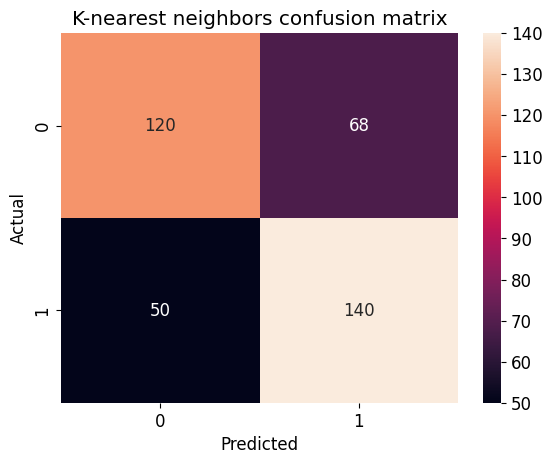

In [150]:
# Confusion matrix.
knn_confusion = metrics.confusion_matrix(y_test, knn_y_pred_test)
# row, column
knn_TP = knn_confusion[1, 1]
knn_TN = knn_confusion[0, 0]
knn_FP = knn_confusion[0, 1]
knn_FN = knn_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(knn_confusion, annot = True, fmt = 'd')
plt.title('K-nearest neighbors confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [151]:
# KNN precision (correctly predicted as positive).
knn_precision = metrics.precision_score(y_test, knn_y_pred_test)
knn_precision

0.6730769230769231

In [152]:
# KNN recall (predicted as positive out of actual positive).
knn_recall = metrics.recall_score(y_test, knn_y_pred_test)
knn_recall

0.7368421052631579

In [153]:
# KNN specificity (predicted as negative out of actual negative).
knn_spec = knn_TN/(knn_TN + knn_FP)
knn_spec

0.6382978723404256

In [154]:
# KNN auc.
knn_auc = metrics.roc_auc_score(y_test, knn_y_pred_test)
knn_auc

0.6875699888017918

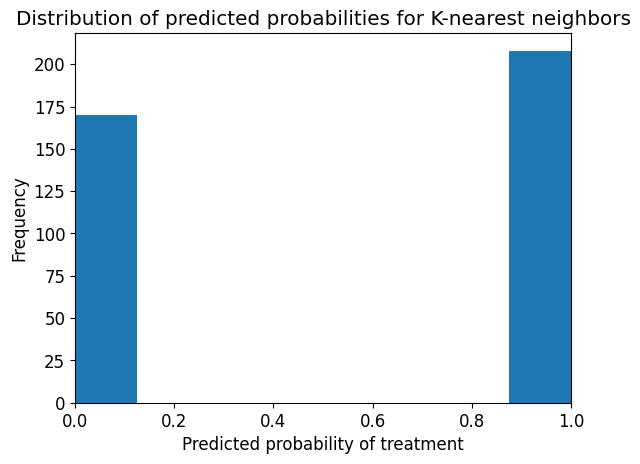

In [155]:
# histogram of predicted probabilities.
knn_y_pred_prob = knn_best.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(knn_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for K-nearest neighbors')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

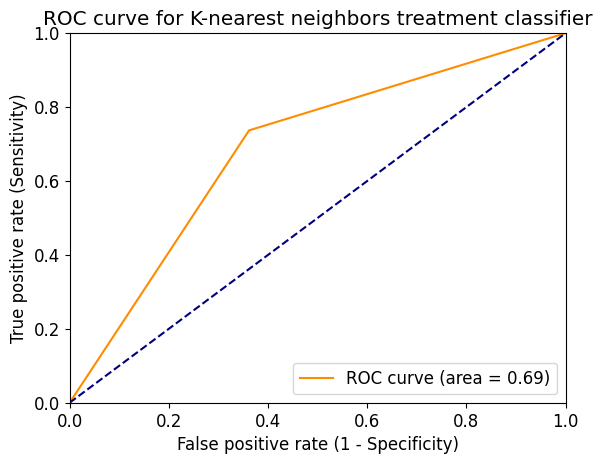

In [156]:
# ROC curve for KNN.
knn_roc_auc = metrics.roc_auc_score(y_test, knn_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K-nearest neighbors treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [158]:
# Decision tree.

# Setup the parameters and distributions to sample from.
feature_size = x.columns.values.shape[0]
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, feature_size),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier.
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object.
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f8e4280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f8e44c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f7abca0>})

In [159]:
# Print the tuned parameters and score.
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 20, 'min_samples_leaf': 7, 'min_samples_split': 7}
Best score is 0.8399653312788906


In [160]:
# Make predictions on train and test to check accuracy.
tree_y_pred_train = tree_cv.predict(x_train)
tree_y_pred_test = tree_cv.predict(x_test)

In [161]:
# Train accuracy (overall correct predictions).
tree_train_accuracy = metrics.accuracy_score(y_train, tree_y_pred_train)
tree_train_accuracy

0.8399545970488081

In [162]:
# Test accuracy (overall correct predictions).
tree_test_accuracy = metrics.accuracy_score(y_test, tree_y_pred_test)
tree_test_accuracy

0.8095238095238095

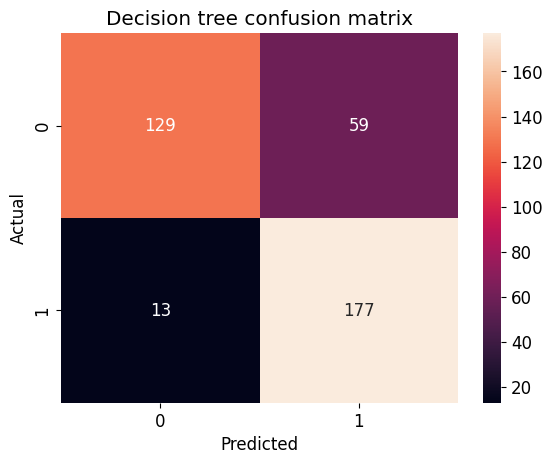

In [164]:
# Confusion matrix.
tree_confusion = metrics.confusion_matrix(y_test, tree_y_pred_test)
# row, column
tree_TP = tree_confusion[1, 1]
tree_TN = tree_confusion[0, 0]
tree_FP = tree_confusion[0, 1]
tree_FN = tree_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(tree_confusion, annot = True, fmt = 'd')
plt.title('Decision tree confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [165]:
# Decision tree precision (correctly predicted as positive).
tree_precision = metrics.precision_score(y_test, tree_y_pred_test)
tree_precision

0.75

In [166]:
# Decision tree recall (predicted as positive out of actual positive).
tree_recall = metrics.recall_score(y_test, tree_y_pred_test)
tree_recall

0.9315789473684211

In [167]:
# Decision tree specificity (predicted as negative out of actual negative).
tree_spec = tree_TN/(tree_TN + tree_FP)
tree_spec

0.6861702127659575

In [168]:
# Decision tree auc (Probability of correct prediction when presented with 2 random cases).
tree_auc = metrics.roc_auc_score(y_test, tree_y_pred_test)
tree_auc

0.8088745800671893

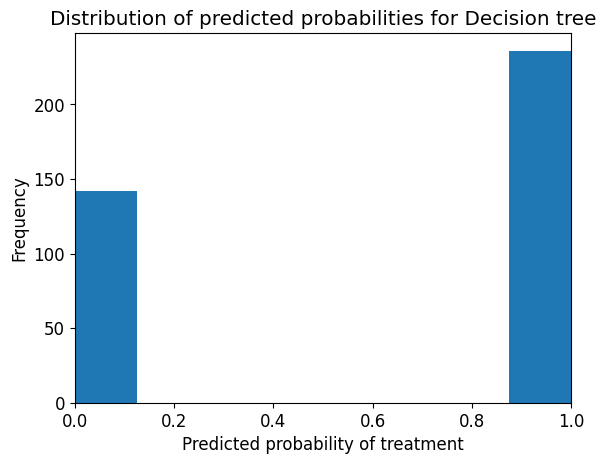

In [169]:
# histogram of predicted probabilities.
tree_y_pred_prob = tree_cv.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(tree_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for Decision tree')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

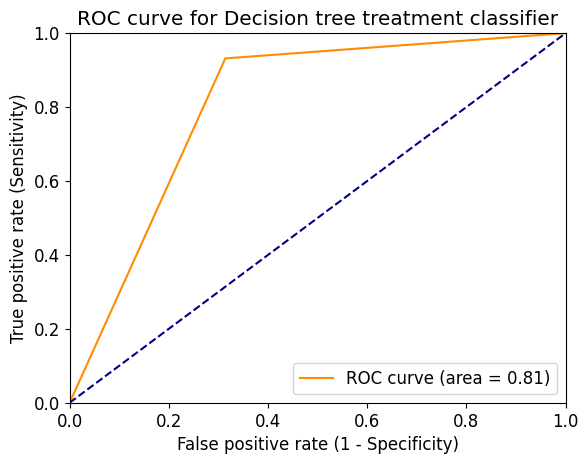

In [170]:
# ROC curve for Decision tree.
tree_roc_auc = metrics.roc_auc_score(y_test, tree_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision tree treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [172]:
# Random forest.

# Setup the parameters and distributions to sample from.
feature_size = x.columns.values.shape[0]
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, feature_size),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier.
forest = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object.
forest_cv = RandomizedSearchCV(forest, param_dist, cv=5)

# Fit it to the data
forest_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f7dd100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11f44dfa0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x121d304c0>})

In [173]:
# Print the tuned parameters and score.
print("Tuned Random forest parameters: {}".format(forest_cv.best_params_))
print("Best score is {}".format(forest_cv.best_score_))

Tuned Random forest parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score is 0.8399653312788906


In [174]:
# Make predictions on train and test to check accuracy.
forest_y_pred_train = forest_cv.predict(x_train)
forest_y_pred_test = forest_cv.predict(x_test)

In [175]:
# Train accuracy (overall correct predictions).
forest_train_accuracy = metrics.accuracy_score(y_train, forest_y_pred_train)
forest_train_accuracy

0.8399545970488081

In [176]:
# Test accuracy (overall correct predictions).
forest_test_accuracy = metrics.accuracy_score(y_test, forest_y_pred_test)
forest_test_accuracy

0.8095238095238095

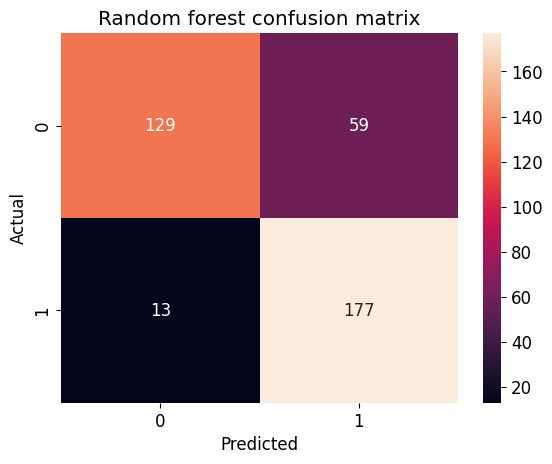

In [178]:
# Confusion matrix.
forest_confusion = metrics.confusion_matrix(y_test, forest_y_pred_test)
# row, column
forest_TP = forest_confusion[1, 1]
forest_TN = forest_confusion[0, 0]
forest_FP = forest_confusion[0, 1]
forest_FN = forest_confusion[1, 0]
# visualize confusion matrix.
sb.heatmap(forest_confusion, annot = True, fmt = 'd')
plt.title('Random forest confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [179]:
# Precision (correctly predicted as positive).
forest_precision = metrics.precision_score(y_test, forest_y_pred_test)
forest_precision

0.75

In [180]:
# Recall (predicted as positive out of actual positive).
forest_recall = metrics.recall_score(y_test, forest_y_pred_test)
forest_recall

0.9315789473684211

In [181]:
# Specificity (predicted as negative out of actual negative).
forest_spec = forest_TN/(forest_TN + forest_FP)
forest_spec

0.6861702127659575

In [182]:
# AUC. (Probability of correctly predict when presented with 2 random cases, 1+, 1-)
forest_auc = metrics.roc_auc_score(y_test, forest_y_pred_test)
forest_auc

0.8088745800671893

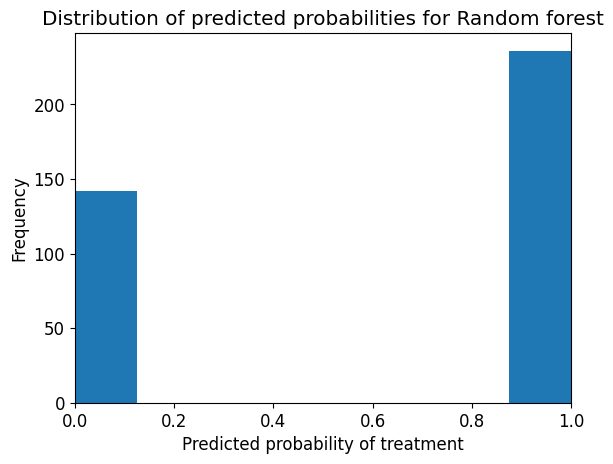

In [183]:
# histogram of predicted probabilities.
forest_y_pred_prob = forest_cv.predict(x_test)
plt.rcParams['font.size'] = 12
plt.hist(forest_y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities for Random forest')
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Frequency')
plt.show()

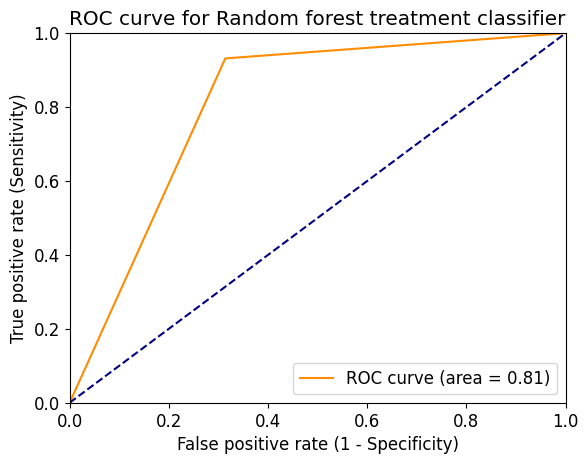

In [184]:
# ROC curve.
forest_roc_auc = metrics.roc_auc_score(y_test, forest_y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', 
         label = 'ROC curve (area = %0.2f)' % forest_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random forest treatment classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()